In [71]:
!pip install missingno
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

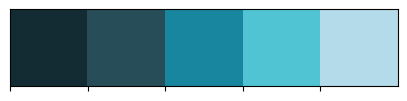

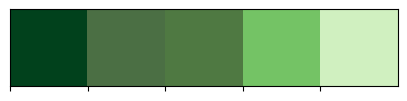

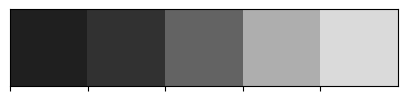

In [72]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

In [73]:
df=pd.read_csv('/content/water_potability.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [75]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [76]:
df.shape

(3276, 10)

In [77]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [78]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

39.01 % of samples are potable (1)


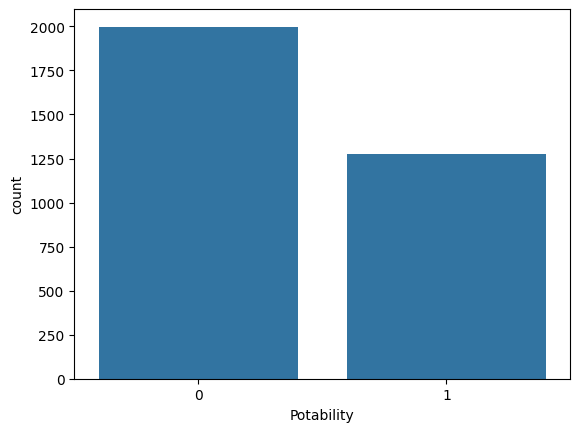

In [79]:
# Count Distribution of target variable
sns.countplot(x = df["Potability"])

print(f"{df.Potability[df.Potability==1].count() / df.Potability.count()*100:.2f} % of samples are potable (1)")

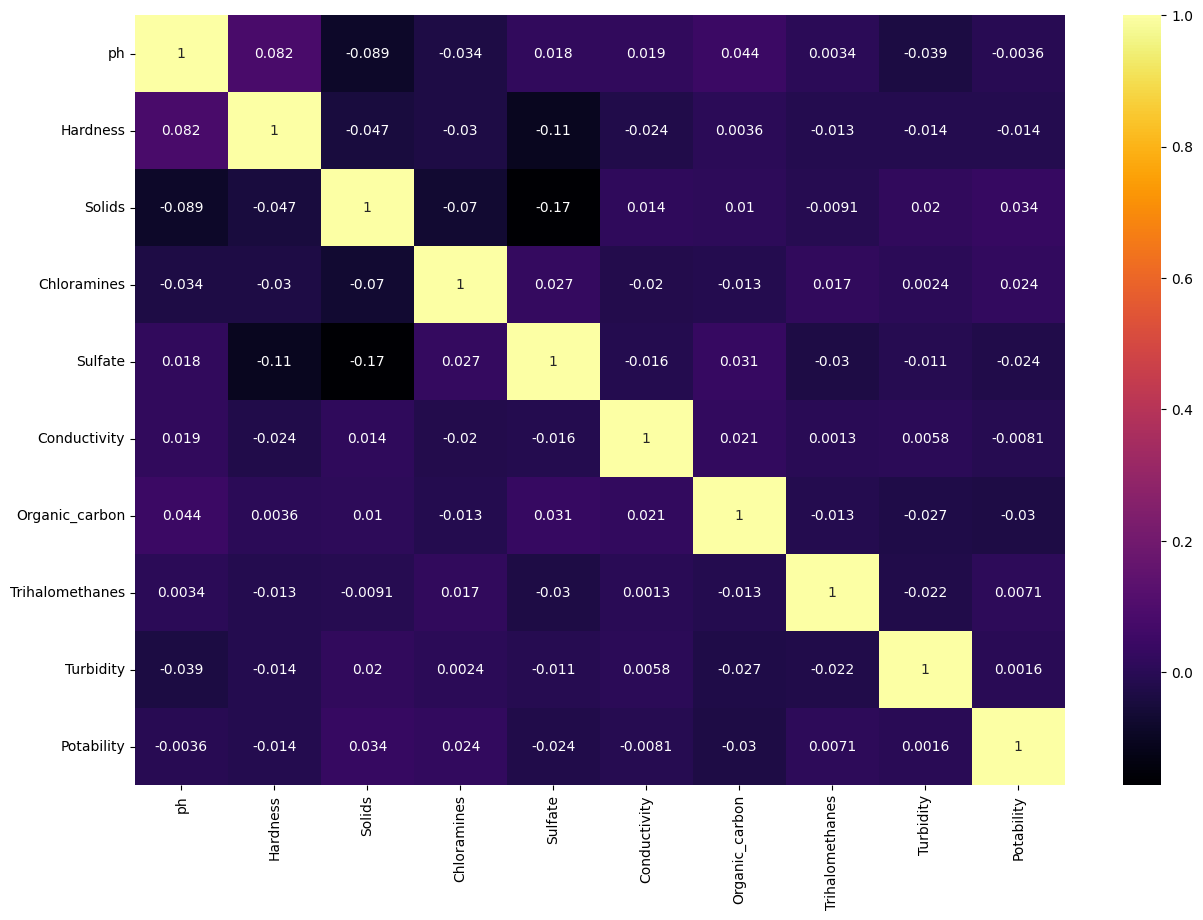

In [80]:
# Correlation matrix for dataset
plt.figure(figsize=(15,10))
sns.heatmap(df.corr() , annot=True , cmap="inferno");

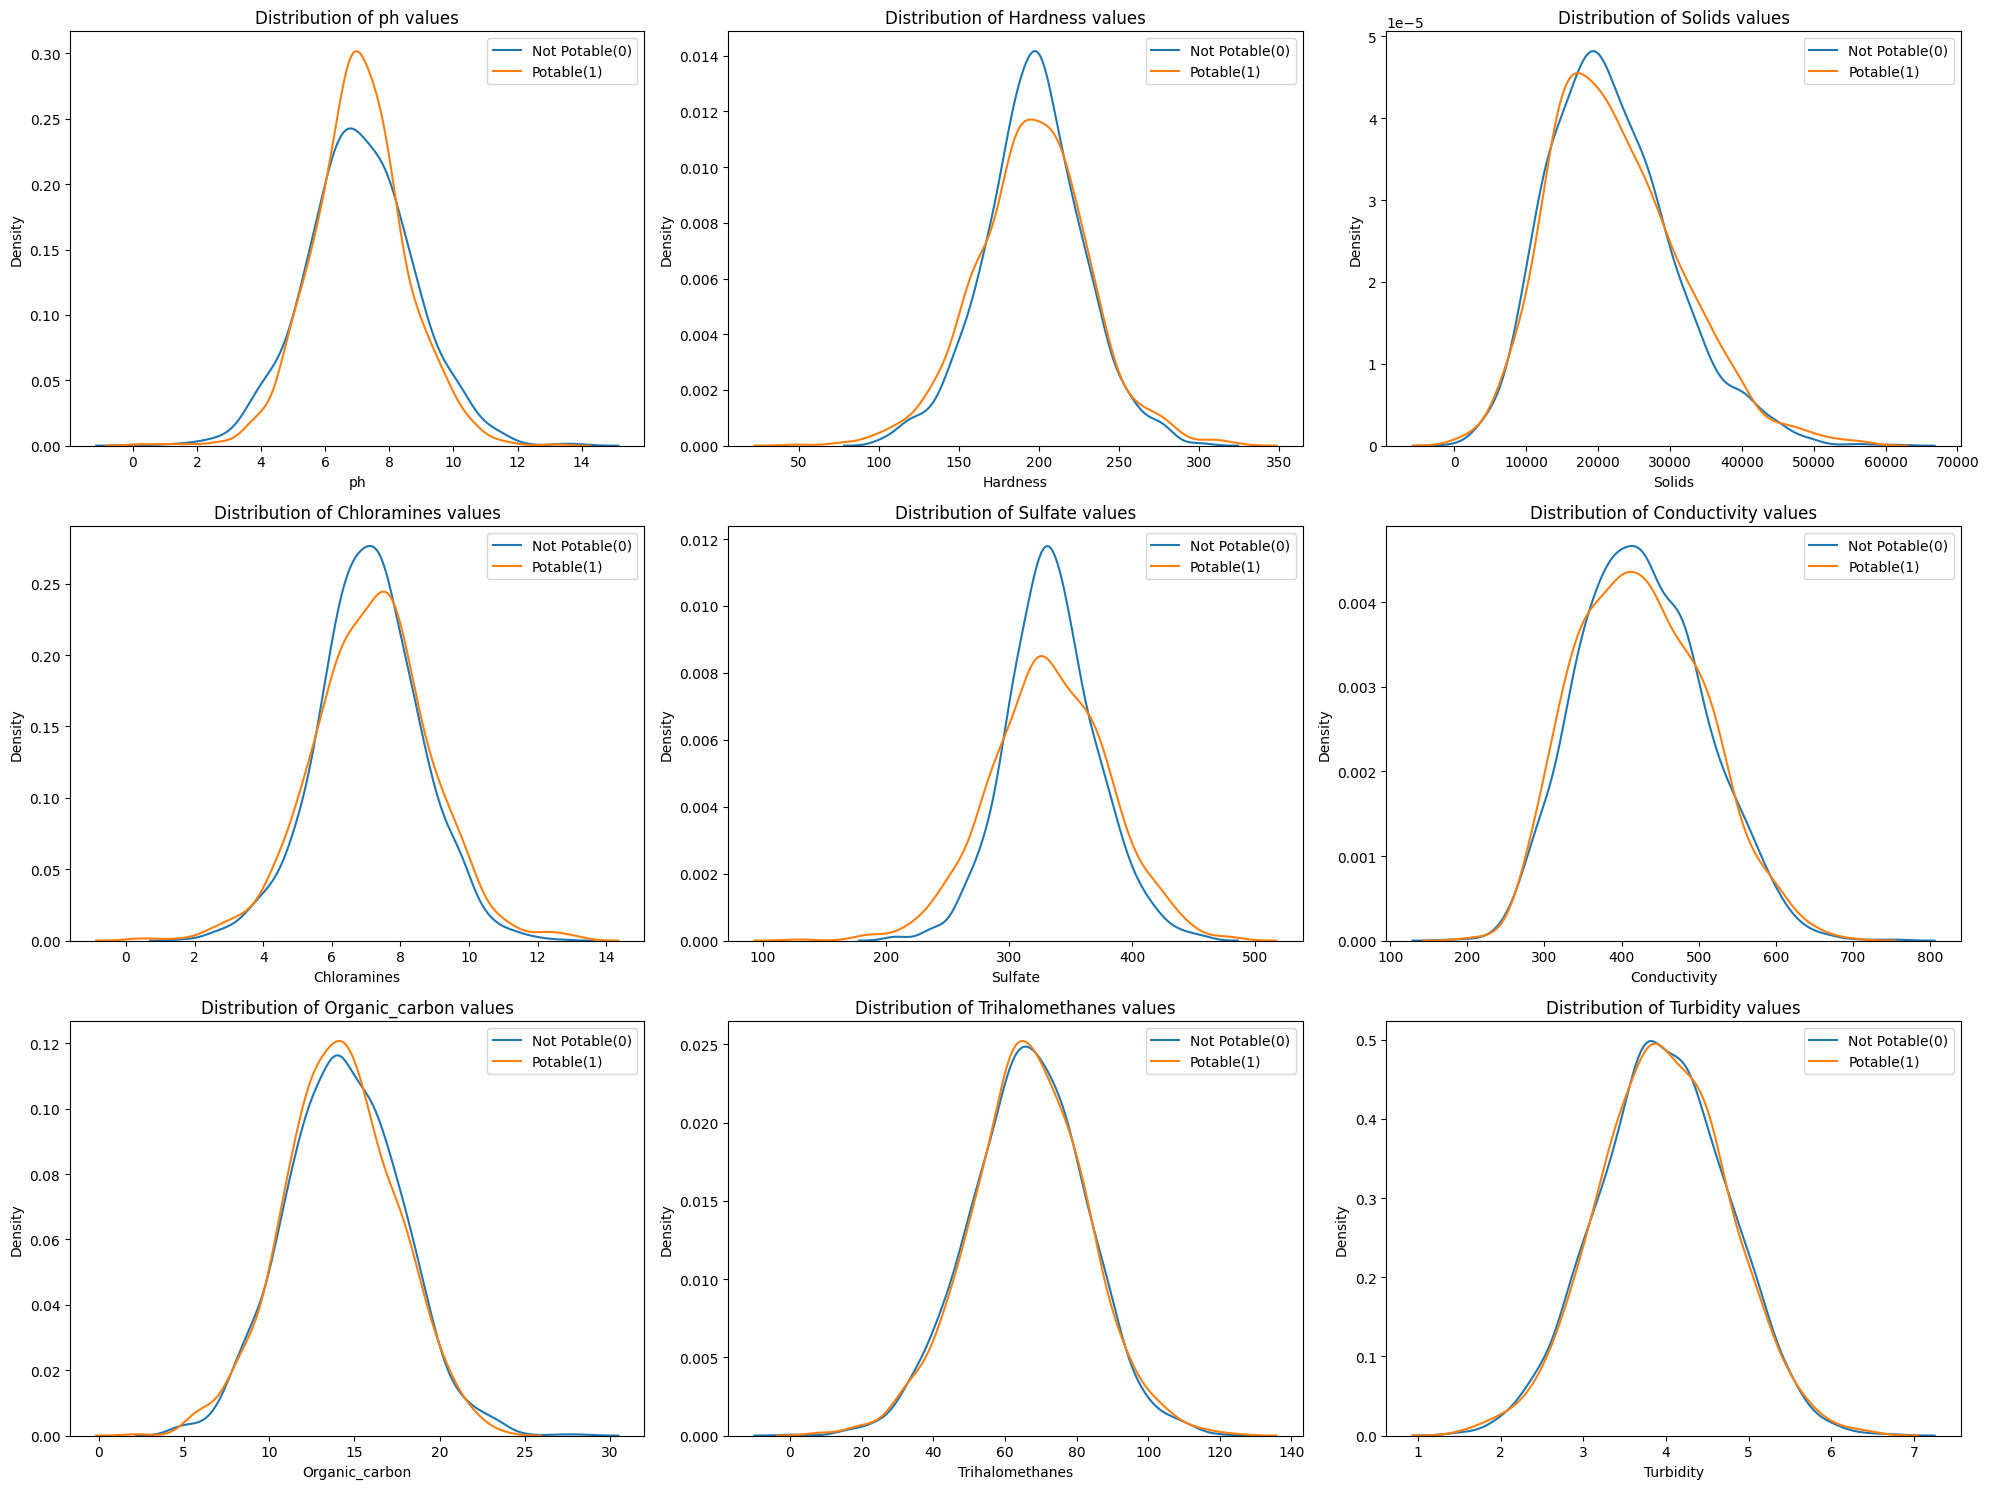

In [81]:
# Distribution of features
potable = df.query("Potability == 1")
not_potable = df.query("Potability == 0")

fig = plt.figure(figsize=(20,15))

for ax , column in enumerate(df.columns[:9]):
    plt.subplot(3 , 3 , ax+1)
    plt.title(f"Distribution of {column} values")
    sns.kdeplot(x = not_potable[column] , label = "Not Potable(0)")
    sns.kdeplot(x = potable[column] , label = "Potable(1)")
    plt.legend(prop = dict(size = 10))


plt.tight_layout()

<ipython-input-82-d6165840b8c3>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-82-d6165840b8c3>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-82-d6165840b8c3>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

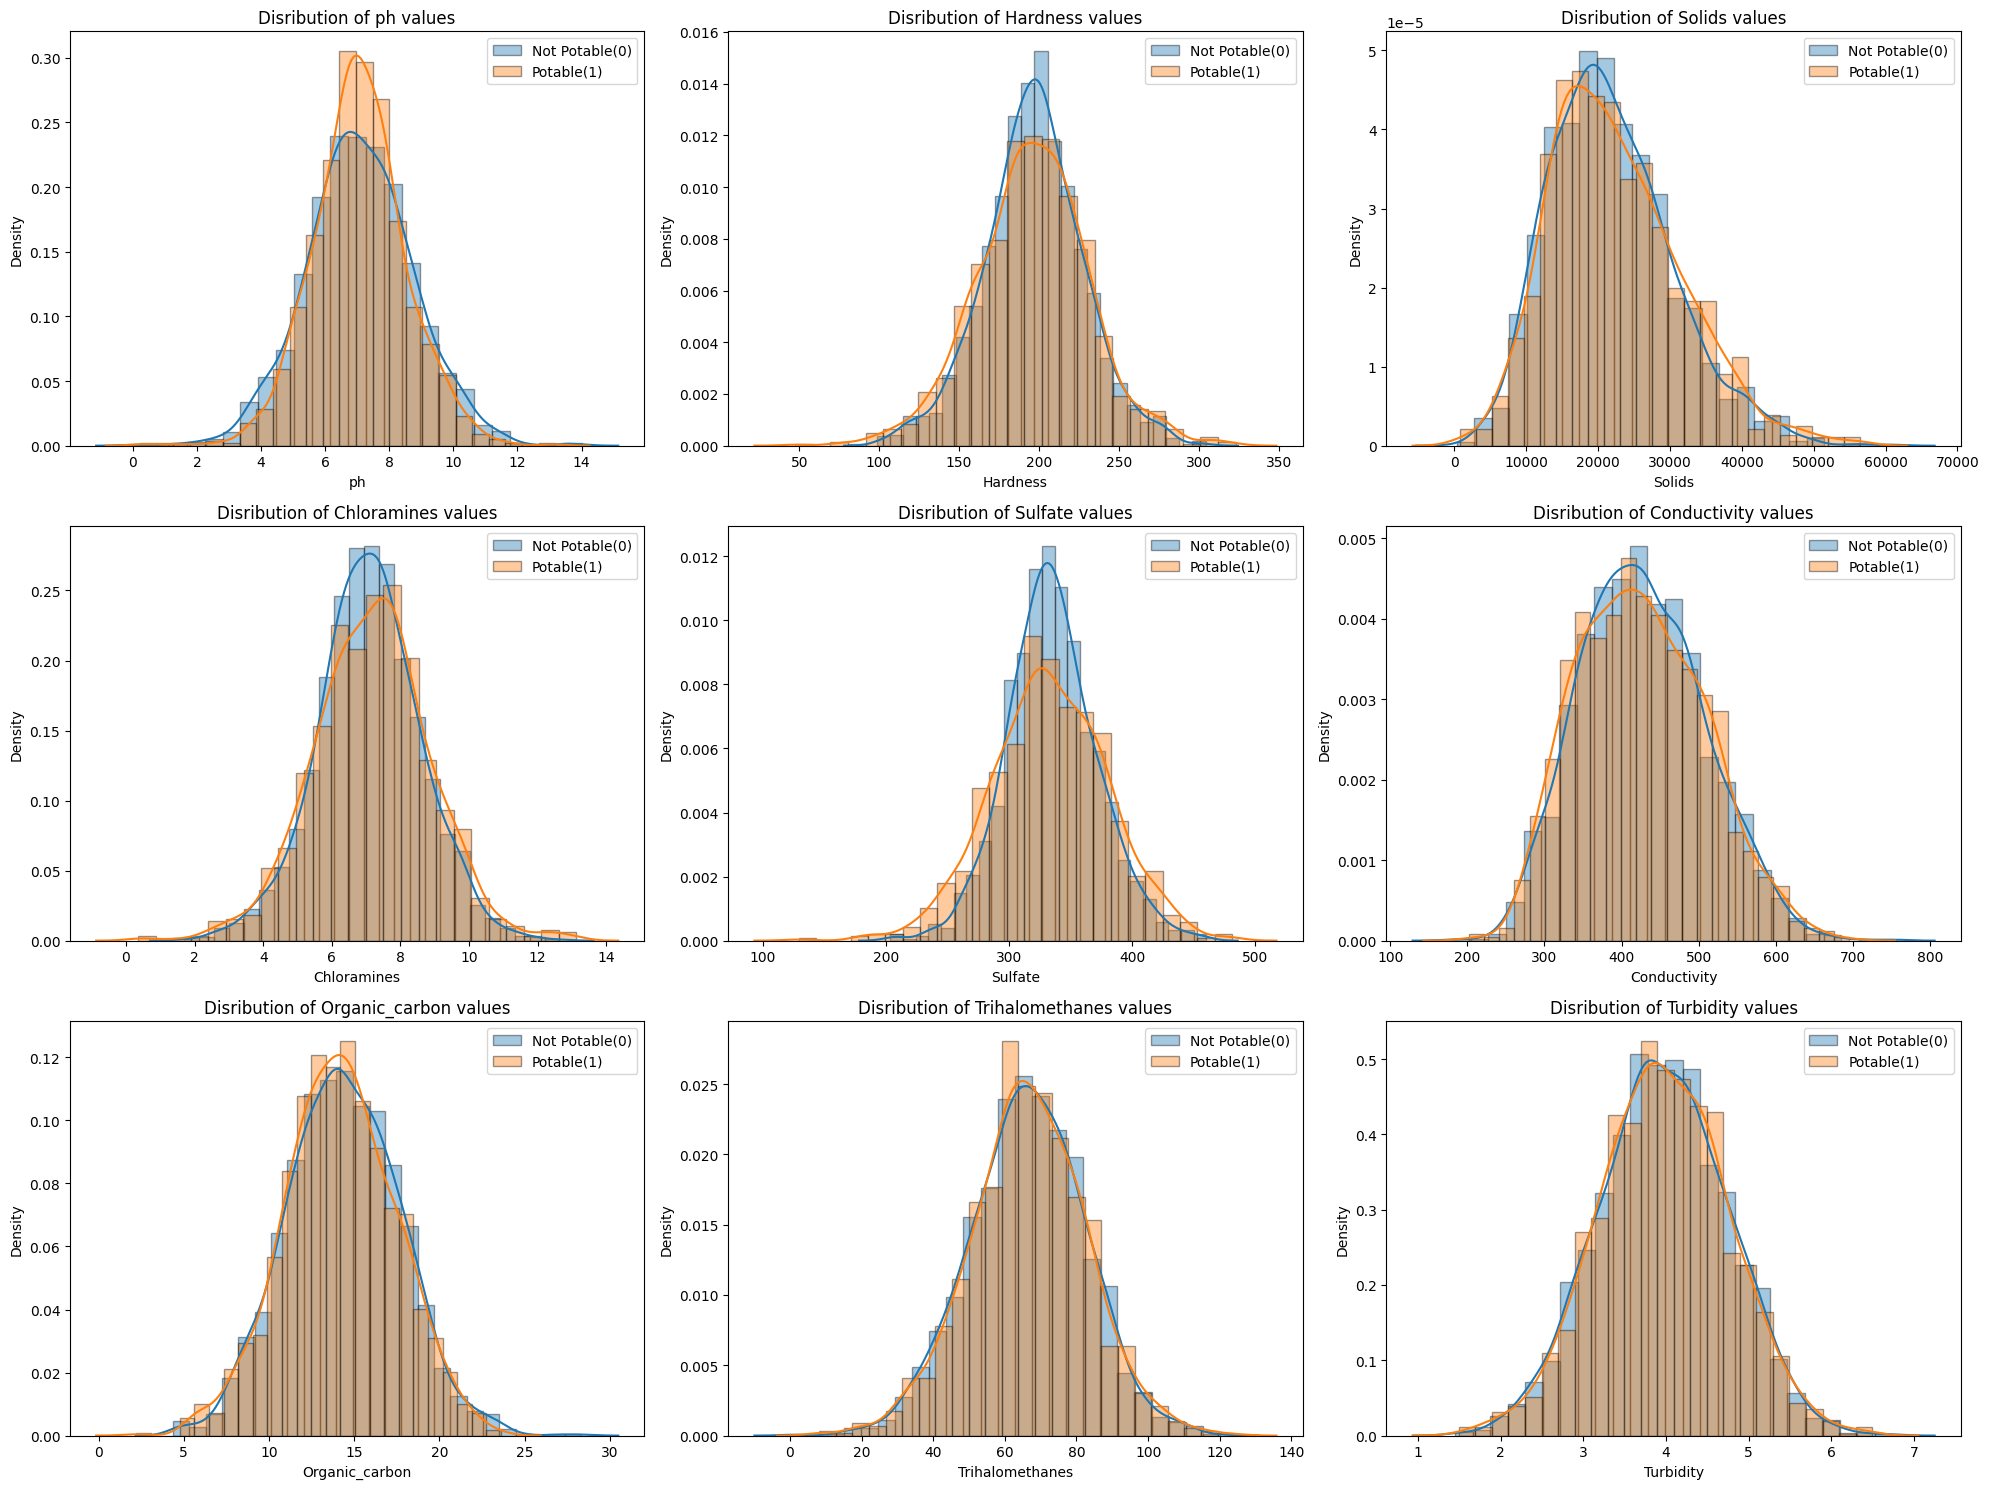

In [82]:
fig = plt.figure(figsize=(20,15))

for ax , column in enumerate(df.columns[:9]):
    plt.subplot(3 ,3 , ax+1)
    plt.title(f"Disribution of {column} values")
    sns.distplot(not_potable[column] , label="Not Potable(0)", hist_kws=dict(edgecolor = "k" , linewidth = 1), bins=25)
    sns.distplot(potable[column], label='Potable(1)', hist_kws=dict(edgecolor='k', linewidth=1), bins=25)
    plt.legend(prop = dict(size = 10))

plt.tight_layout()

In [83]:
def impute_nan(df , variable):
    df[variable] = df[variable].fillna(df[variable].mean())

impute_nan(df , "ph")
impute_nan(df , "Sulfate")
impute_nan(df , "Trihalomethanes")

In [84]:
df.isnull().sum()
from imblearn.over_sampling import SMOTE

In [85]:
# Split into dependent and independent feature
X = df.drop("Potability" , axis=1)
y = df.Potability

# Split into train and test dataset
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.45 , random_state=30 , stratify=y)

# Balancing the data
smt = SMOTE()
X_train , y_train = smt.fit_resample(X_train , y_train)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [86]:
X_train.shape , y_train.shape

((2196, 9), (2196,))

In [87]:
!pip install catboost

# Import the CatBoostClassifier class
from catboost import CatBoostClassifier

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decision Tree": DecisionTreeClassifier(),
         "Naive Bayes": GaussianNB(),
         "ExtraTreesClassifier": ExtraTreesClassifier(),
         "XGBClassifier": XGBClassifier(),
         "CatBoostClassifier": CatBoostClassifier()}

# Create a function to fit and score models

In [88]:
# Import necessary modules
from sklearn.model_selection import cross_val_score

# Create a function to fit and score models
def fit_and_score(models , X_train , X_test , y_train , y_test):

    """
   Fits and evaluates given machine learning models.
   models: a dict of different Scikit_Learn machine learning models
   X_train: training data (no labels)
   X_test: testing data (no labels)
   y_train: training labels
   y_test: test labels
   """

    # Set random seed
    np.random.seed(30)

    # Make a dictionary to keep model scores
    model_scores = {}

    # loop through models
    for name , model in models.items():
        # fit model to data
        model.fit(X_train , y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = cross_val_score(model,
                                            X_test,
                                            y_test,
                                            scoring="accuracy",
                                            cv = 45).mean()

    return model_scores

In [89]:
model_scores = fit_and_score(models , X_train , X_test , y_train , y_test)
model_scores

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6855022	total: 14.5ms	remaining: 2.88s
5:	learn: 0.6842123	total: 17.3ms	remaining: 2.86s
6:	learn: 0.6828647	total: 20ms	remaining: 2.84s
7:	learn: 0.6816598	total: 22.9ms	remaining: 2.84s
8:	learn: 0.6802213	total: 25.7ms	remaining: 2.83s
9:	learn: 0.6787441	total: 28.6ms	remaining: 2.83s
10:	learn: 0.6777803	total: 31.1ms	remaining: 2.8s
11:	learn: 0.6763501	total: 33.9ms	remaining: 2.79s
12:	learn: 0.6748447	total: 36.7ms	remaining: 2.79s
13:	learn: 0.6737857	total: 39.4ms	remaining: 2.78s
14:	learn: 0.6725179	total: 42.3ms	remaining: 2.77s
15:	learn: 0.6707386	total: 45.1ms	remaining: 2.77s
16:	learn: 0.6692254	total: 47.8ms	remaining: 2.76s
17:	learn: 0.6676715	total: 50.6ms	remaining: 2.76s
18:	learn: 0.6662248	total: 53.5ms	remaining: 2.76s
19:	learn: 0.6653708	total: 56.5ms	remaining: 2.77s
20:	learn: 0.6640061	total: 59.4ms	remaining: 2.77s
21:	learn: 0.6631573	total: 62.2ms	remaining: 2.77s
22:	learn: 0.6621493	t

{'Logistic Regression': 0.6163930976430977,
 'KNN': 0.6054082491582491,
 'Random Forest': 0.6515782828282828,
 'Decision Tree': 0.5654040404040404,
 'Naive Bayes': 0.6237584175084175,
 'ExtraTreesClassifier': 0.65625,
 'XGBClassifier': 0.627209595959596,
 'CatBoostClassifier': 0.669844276094276}

{'Logistic Regression': 0.6092121212121212,

 'KNN': 0.6335757575757577,

 'Random Forest': 0.6635151515151515,

 'Decision Tree': 0.5974545454545453,

 'Naive Bayes': 0.6231515151515151,

 'ExtraTreesClassifier': 0.6574545454545455,

 'XGBClassifier': 0.6301818181818182,

 'CatBoostClassifier': 0.6670303030303031
 }